In [1]:
from imitation.algorithms.dagger import _load_trajectory
import numpy as np

In [2]:
traj = _load_trajectory("/home/andrea/policy_compression/results/sampling_overlap_2021_04_16/tmp_sampling_overlap/0/demos/round-000/dagger-demo-20210415_191909_3c36af.npz")

In [3]:
# Copy-pasted from quad evaluation
def plot_trajectories(axs, obs_hist, act_hist):
    # Constraints
    #p_min = -3.0
    #p_max = 3.0
    #v_min = -1.5
    #v_max = 1.5
    T_max = len(obs_hist)-1
    axis_name = ["x", "y", "z"]
    for ax in range(3):
        # position
        axs[0, ax].plot([5.0*state[ax] for state in obs_hist])
        #axs[0, ax].hlines(y=[p_min, p_max], xmin=0, xmax=T_max, linestyles='dashed', color='red')
        axs[0, ax].set_ylabel(f'Pos-{axis_name[ax]}(m)')
            
        # velocity
        axs[1, ax].plot([state[ax+3] for state in obs_hist])
        #axs[1, ax].hlines(y=[v_min, v_max], xmin=0, xmax=T_max, linestyles='dashed', color='red')
        axs[1, ax].set_ylabel(f'Vel-{axis_name[ax]} (m/s)')

    # Roll, pitch, thrust 
    axs[2, 0].plot([5.0*state[6]/np.pi*180 for state in obs_hist], label='roll')
    axs[2, 0].plot([12.0*cmd[0]/np.pi*180 for cmd in act_hist], label='roll_cmd')
    axs[2, 0].set_ylabel("Attitude Roll (Rad)")
    axs[2, 0].set_xlabel('Time (steps)')
    #axs[2, 0].legend()
    
    axs[2, 1].plot([5.0*state[7]/np.pi*180 for state in obs_hist], label='pitch')
    axs[2, 1].plot([12.0*cmd[1]/np.pi*180 for cmd in act_hist], label='pitch_cmd')
    axs[2, 1].set_ylabel("Attitude Pitch (Rad)")
    axs[2, 1].set_xlabel('Time (steps)')
    #axs[2, 1].legend()

    axs[2, 2].plot([12.0*cmd[2] for cmd in act_hist], label='cmd_thrust')
    axs[2, 2].set_ylabel('Thrust (N)')
    axs[2, 2].set_xlabel('Time (steps)')

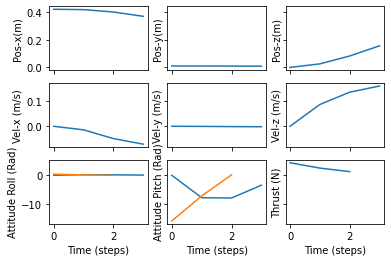

In [4]:
import matplotlib.pyplot as plt
fig_t, axs_t = plt.subplots(3, 3, sharex=True, sharey="row")
plot_trajectories(axs_t, list(traj.obs), list(traj.acts))